In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mist = fetch_openml('mnist_784', as_frame=True)

In [3]:
# import pandas as pd

# mist_df = pd.DataFrame(mist.data, columns=mist.feature_names)
# mist_df

In [4]:
X, y = mist.data, mist.target # X is the feature set, y is the target variable which is the digit label like 0, 1, 2, ..., 9
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.shape

(70000, 784)

In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
y.shape

(70000,)

In [8]:
X.iloc[0]  # Get the first digit
X.iloc[0].to_numpy().reshape(28, 28)  # Reshape it to 28x28 pixels

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

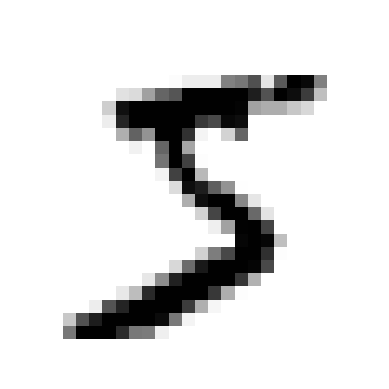

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(image_data):
    image = image_data.reshape(28, 28)  # Reshape the flat array into a 28x28 image
    plt.imshow(image, cmap='binary') # Use binary colormap for black and white
    plt.axis('off')  # Hide the axes

some_digit = X.iloc[0].to_numpy()  # OR use .values instead
plot_digit(some_digit)
plt.show()

In [10]:
y.iloc[0]  # Get the label for the first digit

'5'

In [11]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

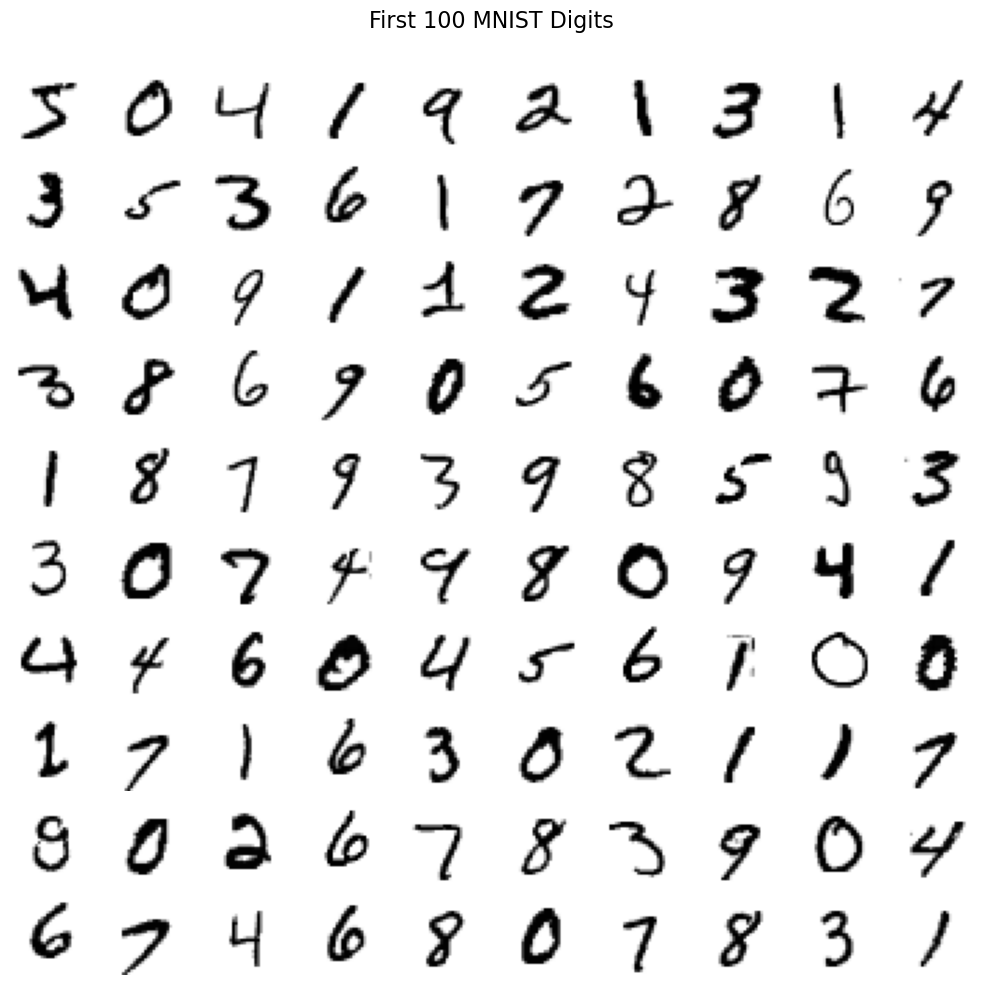

In [12]:
X_100 = X[:100]
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.suptitle("First 100 MNIST Digits", fontsize=16)
for i in range(10):
    for j in range(10):
        index = i * 10 + j
        ax = axes[i][j]
        ax.imshow(X_100.iloc[index].to_numpy().reshape(28, 28), cmap="binary")
        ax.axis("off")  # Hide the axes

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Make room for the suptitle
plt.show()

In [13]:
y_train_5 = (y_train == '5')  # Create a binary target variable for the digit '5'
y_test_5 = (y_test == '5')  # Same for the test set
print(np.count_nonzero(y_test_5).sum(),"<- is the test label and that also train label ->",np.count_nonzero(y_train_5).sum())

892 <- is the test label and that also train label -> 5421


In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)  # Train the model on the training set

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([X.iloc[60001]])  # Predict the label for the first digit

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")  # Evaluate the model using cross-validation

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)  # Train the dummy classifier
print(any(dummy_clf.predict(x_train))) # Check if the dummy classifier predicts any '5's [print false no '5' detected]

False


In [18]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring="accuracy")  # Evaluate the dummy classifier using cross-validation

array([0.90965, 0.90965, 0.90965])

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [20]:
skfolds = StratifiedKFold(n_splits=3) # add shuffle=true if the dataset is not already shuffled

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)  # Create a fresh copy of the classifier
    x_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)  # Train the classifier on the training folds
    y_pred = clone_clf.predict(x_test_fold)  # Predict on the test fold
    n_correct = np.sum(y_pred == y_test_fold)  # Count the number of correct predictions
    print(f"Correct predictions: {n_correct} out of {len(y_pred)} = {n_correct/len(y_pred)}")  # Print the number of correct predictions
    

Correct predictions: 19007 out of 20000 = 0.95035
Correct predictions: 19207 out of 20000 = 0.96035
Correct predictions: 19208 out of 20000 = 0.9604


In [21]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)  # Get predictions for the training set using cross-validation

In [22]:
y_train_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)  # Compute the confusion matrix
cm

array([[53892,   687],
       [ 1891,  3530]])

In [24]:
y_train_perfect_prediction = y_train_5  # Assuming perfect predictions for demonstration
confusion_matrix(
    y_train_5, y_train_perfect_prediction
)  # Compute the confusion matrix for perfect predictions

array([[54579,     0],
       [    0,  5421]])

In [25]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)  # Compute precision == TP / (TP + FP) 3530 / (687 + 3530) 

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)  # Compute recall == TP / (TP + FN) 3530 / (1891 + 3530)

0.6511713705958311

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)  # Compute F1 score

0.7325171197343847

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [29]:
threshold = 0  # Set a threshold for the decision function
y_some_digit_pred = (y_scores > threshold)  # Predict based on the threshold
y_some_digit_pred

array([ True])

In [30]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)  # Predict based on the new threshold
y_some_digit_pred  # Check the predictions based on the new threshold

array([False])

In [31]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")  # Get decision scores for the training set
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

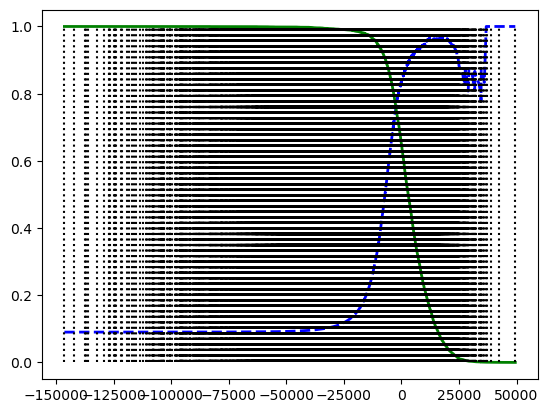

In [32]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)  # Compute precision and recall for different thresholds

plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="Thresholds")
[...]
plt.show()  # Show the plot with precision and recall curves

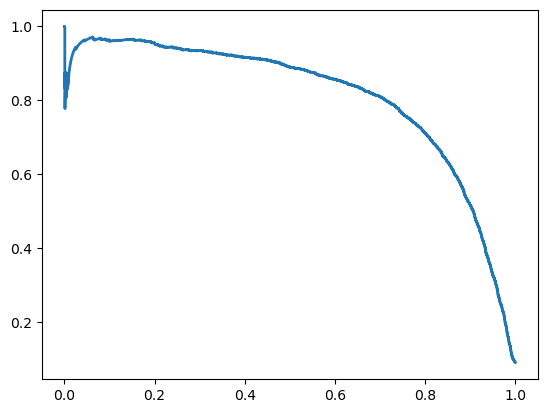

In [33]:
plt.plot(recall, precision, linewidth=2, label = "Precision/recall curve")
[...]
plt.show()  # Show the precision-recall curve

In [34]:
idx_for_90_precision = np.argmax(precision >= 0.90)  # Find the index where precision is at least 0.90
threshold_for_90_precision = thresholds[idx_for_90_precision]  # Get the corresponding threshold
print(f"Threshold for 90% precision: {threshold_for_90_precision}")  # Print the threshold for 90% precision

Threshold for 90% precision: 3370.0194991439594


In [35]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)  # Compute precision for the new predictions

0.9000345901072293

In [36]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)  # Compute recall for the new predictions
print(f"Recall at 90% precision: {recall_at_90_precision}")  # Print the recall at 90% precision

Recall at 90% precision: 0.4799852425751706


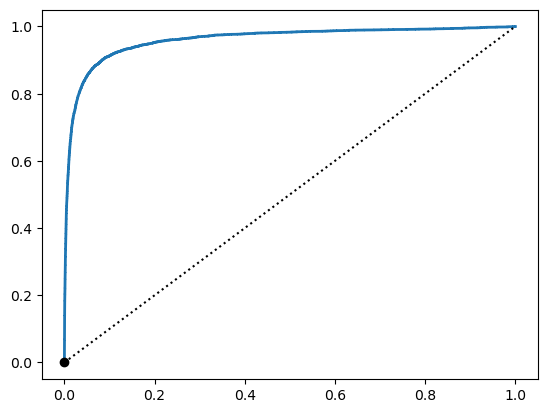

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)  # Compute the ROC curve
idx_for_threshold_at_90 = np.argmax(threshold <= threshold_for_90_precision)
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]  # Get the TPR and FPR at the threshold for 90% precision

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], "k:", label="Random classifier's ROC curve")
plt.plot([fpr_90],[tpr_90], "ko", label="90% precision threshold")
[...]
plt.show()  # Show the ROC curve with the 90% precision threshold

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)  # Compute the AUC score for the ROC curve

np.float64(0.9604938554008616)

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")  # Get predicted probabilities for the training set
y_probas_forest[:2]  # Show the first two predicted probabilities

array([[0.11, 0.89],
       [0.99, 0.01]])

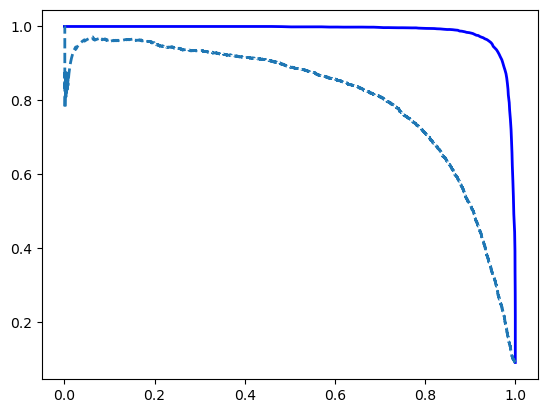

In [40]:
y_scores_forest = y_probas_forest[:, 1]  # Get the scores for the positive class (class '5')
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)  # Compute precision and recall for the forest classifier
plt.plot(recall_forest, precision_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recall, precision, "--", linewidth=2, label="SGD")
[...]
plt.show()  # Show the precision-recall curves for both classifiers

In [41]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # Predict based on a threshold of 0.5
f1_score(y_train_5, y_train_pred_forest)  # Compute F1 score for the forest classifier

0.9274509803921569

In [42]:
roc_auc_score(y_train_5, y_scores_forest)  # Compute the AUC score for the forest classifier

np.float64(0.9983436731328145)

MultiClass Classification

In [44]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)  # Create an SVM classifier with probability estimates
svm_clf.fit(x_train[:2000], y_train[:2000]) # Train the SVM classifier on a subset of the training set

SVC(random_state=42)

In [45]:
svm_clf.predict([some_digit])  # Predict the label for the first digit

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [46]:
some_digit_scores = svm_clf.decision_function([some_digit])  # Get the decision scores for the first digit
some_digit_scores.round(2)  # Round the scores to two decimal places for better readability

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [47]:
class_id = np.argmax(some_digit_scores)  # Get the class ID with the
class_id

np.int64(5)

In [48]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [49]:
svm_clf.classes_[class_id]  # Get the class label for the predicted class IDq

'5'

In [50]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))  # Create a One-vs-Rest classifier with SVM
ovr_clf.fit(x_train[:2000], y_train[:2000])  # Train the One-vs-Rest classifier on a subset of the training set
ovr_clf.predict([some_digit])  # Predict the label for the first digit using the One-vs-Rest classifier

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\abdul\anaconda3\envs\dataS

array(['5'], dtype='<U1')

In [51]:
len(ovr_clf.estimators_)  # Check the number of estimators in the One-vs-Rest classifier

10

In [52]:
sgd_clf = SGDClassifier(random_state=42)  # Create a new SGD classifier
sgd_clf.fit(x_train, y_train)  # Train the SGD classifier on the entire training set
sgd_clf.predict([some_digit])  # Predict the label for the first digit using the SGD classifier

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype='<U1')

In [53]:
sgd_clf.decision_function([some_digit]).round()  # Get the decision scores for the first digit using the SGD classifier

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [54]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")  # Evaluate the SGD classifier using cross-validation

array([0.87365, 0.85835, 0.8689 ])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Create a StandardScaler instance
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))  # Scale the training data
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")  # Evaluate the scaled SGD classifier using cross-validation

array([0.8983, 0.891 , 0.9018])

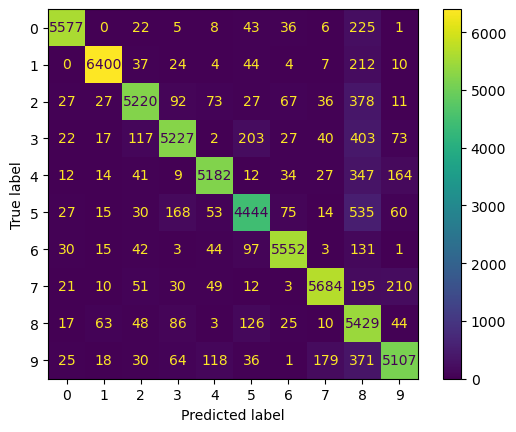

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)  # Get predictions for the training set using cross-validation
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)  # Display the confusion matrix for the training set predictions
plt.show()  # Show the confusion matrix plot

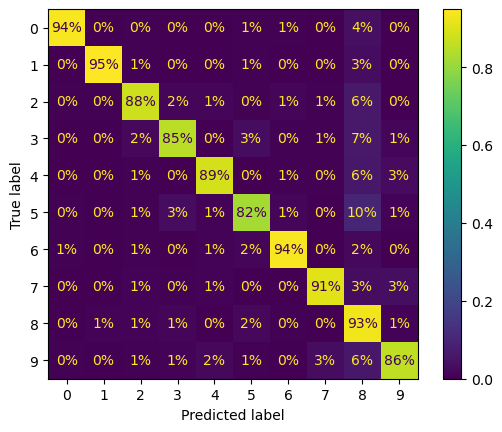

In [57]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format=".0%")  # Display the normalized confusion matrix
plt.show()  # Show the normalized confusion matrix plot

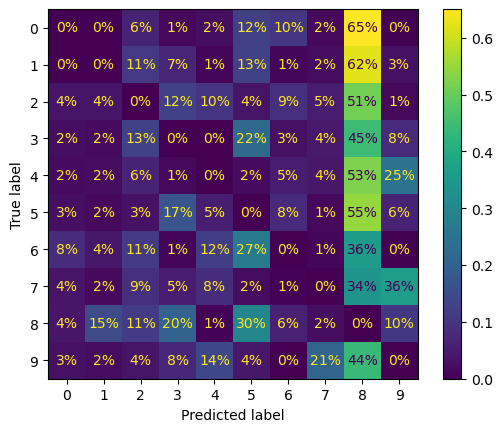

In [58]:
sample_weight = (y_train_pred != y_train)  # Create sample weights based on the predictions
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize='true', values_format=".0%")  # Display the normalized confusion matrix with sample weights
plt.show()  # Show the normalized confusion matrix plot with sample weights

In [ ]:
cl_a, cl_b = '3', '5'
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]  # Get samples of class '3' that were predicted as '3'
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]  # Get samples of class '3' that were predicted as '5'
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]  # Get samples of class '5' that were predicted as '3'
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]  # Get samples of class '5' that were predicted as '5'
[...]

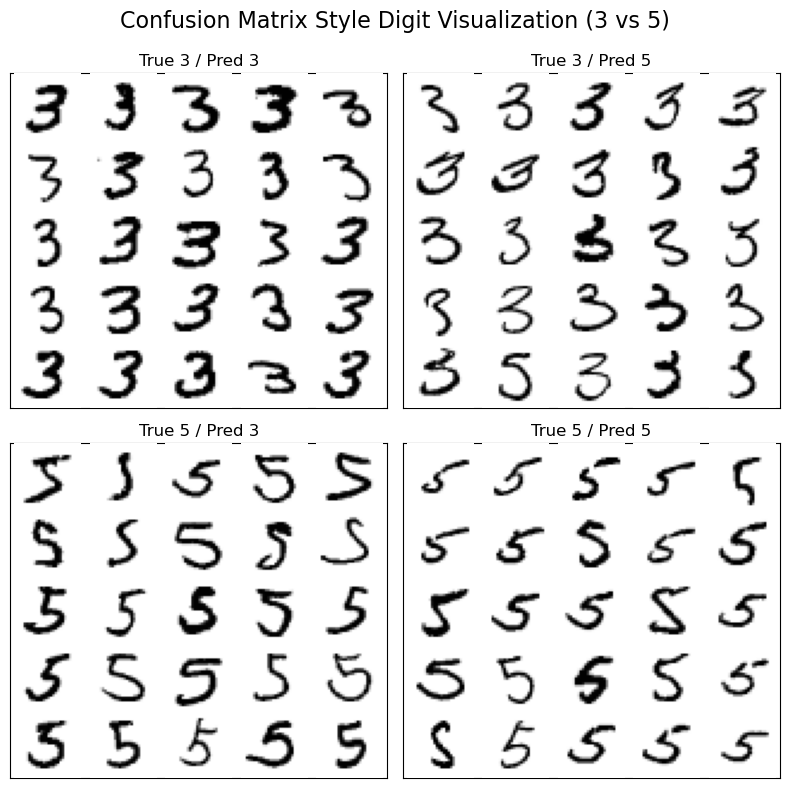

In [72]:
import matplotlib.pyplot as plt
import numpy as np


def plot_images(images, ax, max_images=25):
    images = images[:max_images]
    size = int(np.ceil(np.sqrt(len(images))))  # e.g., 5x5

    for i in range(len(images)):
        row = i // size
        col = i % size
        sub_ax = ax.inset_axes([col / size, 1 - (row + 1) / size, 1 / size, 1 / size])
        sub_ax.imshow(images.iloc[i].to_numpy().reshape(28, 28), cmap="binary")
        sub_ax.axis("off")

    ax.set_xticks([])
    ax.set_yticks([])


# Create a 2x2 confusion matrix plot
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle("Confusion Matrix Style Digit Visualization (3 vs 5)", fontsize=16)

axs[0, 0].set_title("True 3 / Pred 3")
axs[0, 1].set_title("True 3 / Pred 5")
axs[1, 0].set_title("True 5 / Pred 3")
axs[1, 1].set_title("True 5 / Pred 5")

plot_images(x_aa, axs[0, 0])
plot_images(x_ab, axs[0, 1])
plot_images(x_ba, axs[1, 0])
plot_images(x_bb, axs[1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [74]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Convert y_train to integers first
y_train_int = y_train.astype(int)

# Define multilabels
y_train_large = y_train_int >= 7
y_train_odd = y_train_int % 2 == 1

# Combine the binary labels into multilabel array
y_multilabel = np.c_[y_train_large, y_train_odd]

# Create and train the KNN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

# Predict multilabel for the first digit
prediction = knn_clf.predict([some_digit])
print("Multilabel Prediction (>=7, Odd):", prediction)

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Multilabel Prediction (>=7, Odd): [[False  True]]


In [75]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)  # Get predictions for the training set using cross-validation
f1_score(y_multilabel, y_train_knn_pred, average='macro')  # Compute F1 score for the multilabel predictions

0.9764102655606048

In [76]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)  # Create a Classifier Chain with SVC
chain_clf.fit(x_train[:2000], y_multilabel[:2000])  # Train the Classifier Chain on the training set
chain_clf.predict([some_digit])  # Predict multilabel for the first digit using the Classifier Chain

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ClassifierChain was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [77]:
np.random.seed(42)  # Set a random seed for reproducibility
noise = np.random.randint(0, 100, (len(x_train), 784))  # Generate random noise
x_train_mod = x_train + noise  # Add noise to the training data
noise = np.random.randint(0, 100, (len(x_test), 784))  # Generate random noise for the test set
x_test_mod = x_test + noise  # Add noise to the test data
y_train_mod = y_train  # Copy the original labels
y_test_mod = x_test  # Copy the original test labels

In [80]:
knn_clf = KNeighborsClassifier()  # Create a new KNN classifier
knn_clf.fit(
    x_train_mod, y_train_mod
)  # Train the KNN classifier on the modified training set

# Use .iloc[0] to safely get the first row by position
clean_digit = knn_clf.predict([x_test_mod.iloc[0]])[0]  # Get the predicted label

# Now plot the corresponding image
plot_digit(x_test_mod.iloc[0])  # Plot the image (not the label!)
plt.title(f"Predicted Label: {clean_digit}")
plt.show()

c:\Users\abdul\anaconda3\envs\dataS\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AttributeError: 'Series' object has no attribute 'reshape'